In [4]:
import pandas as pd
import numpy as np
from collections import Counter
from ast import literal_eval
from matplotlib import pyplot as plt
import scipy.stats as stats
from pandas.plotting import table

# Top dropout pages

In [5]:
df = pd.read_csv('/Users/matthijsvossen/Documents/Data/data.csv', converters={"url_id_path": literal_eval, "seconds_spent_path": literal_eval})
url_references = pd.read_csv('/Users/matthijsvossen/Documents/Data/url_references_reduced.csv')

In [5]:
df.head(1000)

,visitor_id[visit_number],url_id_path,seconds_spent_path,start_number,visited_mijnomgeving,event_src_site_id
0,0[1],"[188, 1557, 3, 1, 13, 14, 21, 16, 14, 18, 14, ...","[4, 17, 5, 7, 31, 27, 126, 55, 9, 13, 3, 328, 5]",1644099614035,1,0
1,1[1],"[1557, 3, 1, 13, 1556]","[14, 4, 4, 33, 0]",1642603154936,1,1
2,2[1],[978],[0],1649784712759,0,0
3,3[1],"[188, 194, 784]","[5, 20, 0]",1664380711086,0,0
4,4[1],"[23, 1557, 3, 13]","[0, 163, 4, 151]",1642669318114,1,1
...,...,...,...,...,...,...
995,586[16],"[901, 223]","[8, 0]",1650468720814,0,0
996,586[17],[237],[3],1651827633029,0,0
997,586[18],"[188, 901, 966, 889]","[32, 27, 57, 26]",1654526728475,0,0
998,586[19],"[889, 278]","[50, 0]",1654686502709,0,0


In [6]:
url_references.head(10)

,id,urls
0,1,https://mijn.abp.nl/
1,2,https://mijn.abp.nl/welkom/
2,3,https://mijn.abp.nl/welkom
3,4,https://mijn.abp.nl/plan-uw-pensioen/zelf-same...
4,5,https://mijn.abp.nl/plan-uw-pensioen/zelf-same...
5,6,https://mijn.abp.nl/pensioenoverzicht/
6,7,https://mijn.abp.nl/pensioenoverzicht
7,8,https://mijn.abp.nl/Account/login
8,9,https://mijn.abp.nl/account/login
9,10,https://mijn.abp.nl/account/login/


In [6]:
def get_final_page(list):
    i = -1
    while len(list) > 1 and list[i] == 1556:
            i -= 1
    if list[i] != 1556:
        return list[i]
    return None

def get_final_no_logout(list):
    if 1556 in list:
        return None
    return list[-1]

def get_urls(pages):
    urls = []
    for page in pages:
        url = url_references.loc[url_references['id'] == page]['urls'].tolist()
        urls.append(url)
    return urls

In [7]:
page_dropouts = [get_final_page(path) for path in df["url_id_path"]]
page_dropouts = Counter(page_dropouts).most_common()
page_dropouts = pd.DataFrame(page_dropouts, columns = ['page', 'count'])
page_dropouts = page_dropouts.dropna()

page_dropouts_no_logout = [get_final_no_logout(path) for path in df["url_id_path"]]
page_dropouts_no_logout = Counter(page_dropouts_no_logout).most_common()
page_dropouts_no_logout = pd.DataFrame(page_dropouts_no_logout, columns = ['page', 'count'])
page_dropouts_no_logout = page_dropouts_no_logout.dropna()

In [39]:
page_dropouts.head(10)

,page,count
0,1557.0,1197155
1,13.0,994222
2,1.0,307157
3,237.0,207825
4,7.0,204466
5,17.0,199732
6,12.0,166481
8,188.0,129645
9,966.0,73449
10,5.0,71530


In [40]:
page_dropouts_no_logout.head(5)

,page,count
1,1557.0,1012056
2,13.0,614996
3,237.0,205128
4,1.0,156527
5,188.0,124951


In [41]:
plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "lightgray",
    "figure.facecolor": "#212121",
    "figure.edgecolor": "#212121",
    "savefig.facecolor": "#212121",
    "savefig.edgecolor": "#212121"})

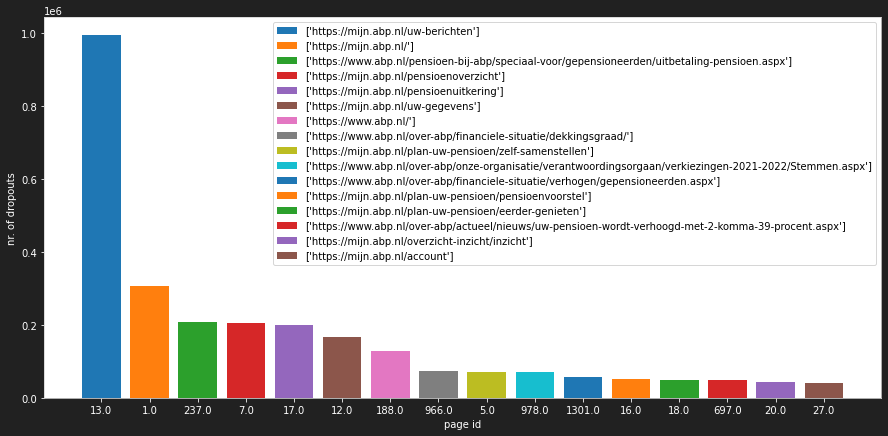

In [42]:
n = 15 # nr. of bins

fig = plt.subplots(figsize = (15,7))
pages, counts = page_dropouts['page'][1:n+2].tolist(), page_dropouts['count'][1:n+2].tolist()
labels = get_urls(pages)
xs = np.arange(len(pages))
plt.xticks(xs, pages)

for i, x in enumerate(xs):
    plt.bar(i, counts[x])

plt.xlabel('page id')
plt.ylabel('nr. of dropouts')
plt.legend(labels)

plt.savefig('dropouts.png')

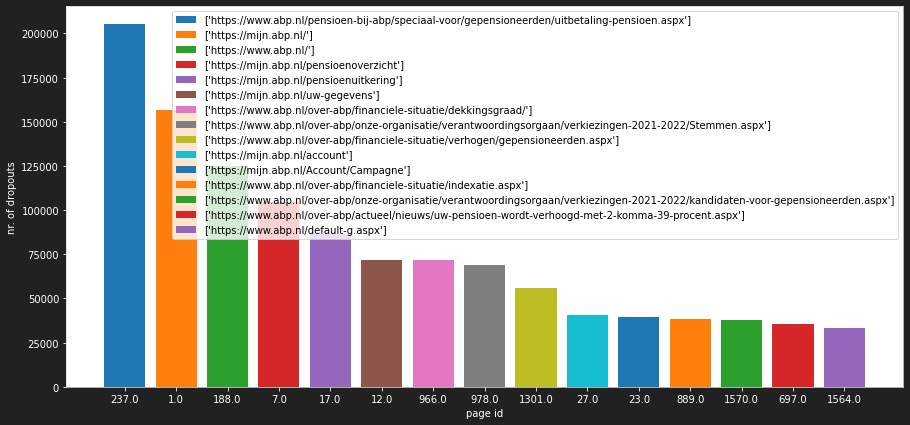

In [44]:
n = 15 # nr. of bins

fig = plt.subplots(figsize = (15,7))
pages, counts = page_dropouts_no_logout['page'][2:n+2].tolist(), page_dropouts_no_logout['count'][2:n+2].tolist()
labels = get_urls(pages)
xs = np.arange(len(pages))
plt.xticks(xs, pages)

for i, x in enumerate(xs):
    plt.bar(i, counts[x])

plt.xlabel('page id')
plt.ylabel('nr. of dropouts')
plt.legend(labels)

plt.savefig('dropouts_no_logout.png')

# Dropout distribution

In [8]:
def get_timeuntil_dropout(list):
    return sum(list)

In [129]:
dropout_times = [get_timeuntil_dropout(times) for times in df['seconds_spent_path'] if get_timeuntil_dropout(times) != 0]

,0
0,630
1,55
2,25
3,318
4,1438


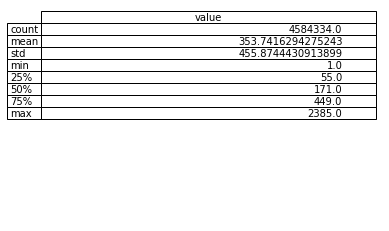

In [142]:
pd.options.display.float_format = '{:.2f}'.format
dropout_times_df = pd.DataFrame(dropout_times)
z = np.abs(stats.zscore(dropout_times_df))
dropout_times_cleaned_df = dropout_times_df[(z<3).all(axis=1)]
desc = dropout_times_cleaned_df.describe()
desc = desc.rename(columns={0: "value"})

plot = plt.subplot(111, frame_on=False)

#remove axis
plot.xaxis.set_visible(False) 
plot.yaxis.set_visible(False) 

#create the table plot and position it in the upper left corner
table(plot, desc,loc='upper right')

#save the plot as a png file
plt.savefig('desc_plot.png')

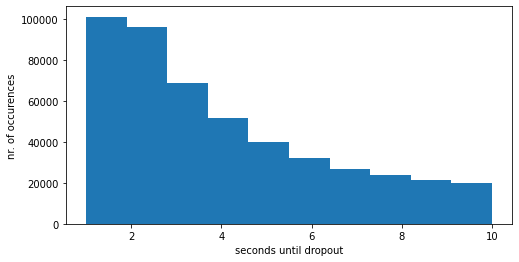

In [150]:
cleaned_list = dropout_times_cleaned_df[0].tolist()
shortened_dropout_times = [time for time in cleaned_list if time <= 10]
shortened_dropout_times = pd.DataFrame(shortened_dropout_times)
fig = plt.subplots(figsize=(8,4))
plt.hist(shortened_dropout_times, bins=10)
plt.xlabel('seconds until dropout')
plt.ylabel('nr. of occurences')
plt.savefig('dropouts_hist.png')

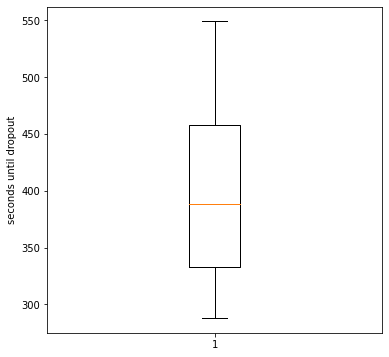

In [27]:
fig = plt.subplots(figsize=(6,6))
plt.boxplot(dropout_times_cleaned_df)
plt.ylabel('seconds until dropout')
plt.savefig('dropouts_boxplot.png')